In [1]:
# Isolate and Reinstall Key Libraries
#!pip uninstall -y numpy pandas

In [2]:
# Clear Environment Cache
#!pip cache purge

In [3]:
# Reinstall Specific Versions
#!pip install numpy==1.21 pandas==1.3

In [4]:
# installing libs
!pip install feature-engine

In [5]:
'''
# Verify Compatibility
import numpy as np
import pandas as pd

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
'''

'\n# Verify Compatibility\nimport numpy as np\nimport pandas as pd\n\nprint("Numpy version:", np.__version__)\nprint("Pandas version:", pd.__version__)\n'

In [6]:
# Uninstall problematic packages
!pip uninstall -y catboost lightgbm xgboost feature-engine numpy pandas

# Install specific compatible versions
!pip install numpy==1.24.3 pandas==2.0.3 scikit-learn
!pip install catboost==1.0.6 xgboost==1.6.2 lightgbm==3.3.5 feature-engine==1.5.0
!pip uninstall -y lightgbm
!pip install lightgbm
!pip install scikit-learn==1.1.3

Found existing installation: catboost 0.25.1
Uninstalling catboost-0.25.1:
  Successfully uninstalled catboost-0.25.1
Found existing installation: lightgbm 4.5.0
Uninstalling lightgbm-4.5.0:
  Successfully uninstalled lightgbm-4.5.0
Found existing installation: xgboost 1.6.2
Uninstalling xgboost-1.6.2:
  Successfully uninstalled xgboost-1.6.2
Found existing installation: feature-engine 1.5.0
Uninstalling feature-engine-1.5.0:
  Successfully uninstalled feature-engine-1.5.0
Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Successfully uninstalled numpy-1.22.4
Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Successfully uninstalled pandas-2.0.3
  Using cached numpy-1.24.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-2.0.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata (18 kB)
Using cached numpy-1.24.3-cp39-cp39-macosx_10_9_x86_64.whl (19.8 MB)
Using cached pandas-2.0.3-cp39-cp39-macosx_10_9_x86_64.whl (11.8 MB)
ERROR: pi

In [7]:
# importing libs
import os
import numpy as np
import pandas as pd

# pipeline libs
from sklearn.pipeline import Pipeline

# feature-engine libs
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import CategoricalImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer

# trainning models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# machine learning libs
from catboost import Pool
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# machine learning metrics
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [8]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/classification-II


In [9]:
# Read the dataset
df_abt = pd.read_csv('/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/databases/propensao_revenda_abt.csv')
df_abt.head() 

# get the training base
df_train = df_abt.query('data_ref_safra < "2018-03-01"')

# get the evaluation base (out of time)
df_oot = df_abt.query('data_ref_safra == "2018-03-01"')

key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'

features = cat_vars + num_vars

# training data
X_train = df_train[features]
y_train = df_train[target]

# evaluation data (out of time)
X_oot = df_oot[features]
y_oot = df_oot[target]

In [10]:
dt = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
    ('Decision_Tree', DecisionTreeClassifier(random_state=42,)) 
])

In [11]:
dt.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('categoric_imputer',
                 CategoricalImputer(return_object=True, variables=['uf'])),
                ('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('Decision_Tree', DecisionTreeClassifier(random_state=42))])

In [12]:
print('ROC_AUC for training with default parameters:', roc_auc_score(y_train, dt.predict(X_train)))
print('ROC_AUC for oot with default parameters:', roc_auc_score(y_oot, dt.predict(X_oot)))

ROC_AUC for training with default parameters: 0.9996246246246246
ROC_AUC for oot with default parameters: 0.7831532768042844


In [13]:
parameters = {
    'Decision_Tree__max_depth': [None, 3, 4, 5, 6, 7, 9, 11],
    'Decision_Tree__criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(estimator=dt, param_grid=parameters, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 4}

In [14]:
best_model = grid_search.best_estimator_

In [15]:
best_model.predict_proba(X_oot)[:, 1] # Whenever calculating the roc_auc_score it is necessary to pass the probabilities of 1.

array([0.67955801, 0.00726392, 0.00726392, ..., 0.06326304, 0.06326304,
       0.06326304])

In [16]:
roc_auc_score(y_oot, best_model.predict_proba(X_oot)[:, 1])

0.899226885661598

In [17]:
recall_score(y_oot, best_model.predict(X_oot))

0.7697642163661581

In [18]:
results_cv = pd.DataFrame(grid_search.cv_results_)
results_cv.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Decision_Tree__criterion,param_Decision_Tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.033747,0.004825,0.018818,0.007634,entropy,4,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.903822,0.875689,0.901301,0.911307,0.892966,0.897017,0.012167,1
2,0.031631,0.005826,0.014212,0.004745,gini,4,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.899050,0.870713,0.900654,0.905160,0.898453,0.894806,0.012273,2
3,0.032642,0.003825,0.012985,0.003704,gini,5,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.899596,0.872724,0.896551,0.900762,0.897342,0.893395,0.010446,3
9,0.024297,0.003229,0.011984,0.001282,entropy,3,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.895534,0.872919,0.897033,0.905386,0.891993,0.892573,0.010765,4
1,0.032853,0.007847,0.014654,0.003863,gini,3,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.892092,0.869464,0.892527,0.902151,0.895258,0.890299,0.011021,5
11,0.028155,0.005208,0.015881,0.008930,entropy,5,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.893662,0.866031,0.890687,0.906644,0.886862,0.888777,0.013174,6
12,0.032695,0.006967,0.015621,0.005687,entropy,6,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.885703,0.863175,0.887787,0.893521,0.885525,0.883142,0.010395,7
4,0.030673,0.005304,0.014554,0.004304,gini,6,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.886496,0.858861,0.879699,0.882799,0.889323,0.879436,0.010792,8
13,0.024149,0.002374,0.013437,0.002423,entropy,7,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.869642,0.847482,0.884605,0.878636,0.887969,0.873667,0.014496,9
5,0.032029,0.003643,0.013347,0.003290,gini,7,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.872126,0.853061,0.867952,0.868321,0.878323,0.867957,0.008329,10


## GridSearchCV without Pipeline

In [19]:
rf = RandomForestClassifier(random_state=42, )

parameters = {
    'n_estimators': [50, 100, 300],#500, 1000],
    'criterion' : ["gini", 'entropy'],
    'max_depth': [3, 5, 7, 9, 11, 13], 
    'min_samples_split': [2, 4, 6]
}

grid_serarch = GridSearchCV(estimator=rf, param_grid=parameters, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

In [20]:
grid_serarch.fit(X_train[num_vars], y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]},
             scoring='roc_auc', verbose=2)

In [21]:
grid_serarch.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_split': 2,
 'n_estimators': 300}

In [22]:
best_model = grid_serarch.best_estimator_
roc_auc_score(y_oot, best_model.predict_proba(X_oot[num_vars])[:, 1])

0.9125004661300857

In [23]:
recall_score(y_oot, best_model.predict(X_oot[num_vars]))

0.8030513176144244

## RandomizeSearchCV

In [24]:
rf = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
    ('rf', RandomForestClassifier(random_state=42)) 
])


parameters = {
    'rf__n_estimators': range(1, 1000, 100),
    'rf__criterion' : ["gini", 'entropy'],
    'rf__max_depth': [3, 5, 7, 9, 11, 13], 
    'rf__min_samples_split': [2, 4, 6],
    'rf__max_features': np.arange(0.1, 1.1, 0.1)
}

randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=parameters, scoring='roc_auc', n_iter=25, cv=5, n_jobs=-1, verbose=2)
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('numeric_imputer',
                                              ArbitraryNumberImputer(arbitrary_number=-999,
                                                                     variables=['tot_orders_12m',
                                                                                'tot_items_12m',
                                                                                'tot_items_dist_12m',
                                                                                'receita_12m',
                                                                                'recencia'])),
                                             ('categoric_imputer',
                                              CategoricalImputer(return_object=True,
                                                                 variables=['uf'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(variables=['uf'])),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': [3, 5, 7, 9, 11, 13],
                                        'rf__max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'rf__min_samples_split': [2, 4, 6],
                                        'rf__n_estimators': range(1, 1000, 100)},
                   scoring='roc_auc', verbose=2)

In [25]:
np.arange(0.1, 1.1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [26]:
pd.DataFrame(randomized_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__n_estimators,param_rf__min_samples_split,param_rf__max_features,param_rf__max_depth,param_rf__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,3.191355,0.050802,0.129650,0.008870,701,6,0.3,13,entropy,"{'rf__n_estimators': 701, 'rf__min_samples_spl...",0.925492,0.900047,0.914723,0.925854,0.923110,0.917845,0.009766,1
2,2.592816,0.102003,0.112794,0.012479,601,4,0.3,11,entropy,"{'rf__n_estimators': 601, 'rf__min_samples_spl...",0.926021,0.900879,0.914454,0.925689,0.922042,0.917817,0.009438,2
20,3.702464,0.044686,0.146697,0.003549,901,6,0.4,9,gini,"{'rf__n_estimators': 901, 'rf__min_samples_spl...",0.920733,0.895261,0.911502,0.924256,0.918326,0.914016,0.010263,3
11,2.870154,0.089068,0.103442,0.007083,601,2,0.5,9,gini,"{'rf__n_estimators': 601, 'rf__min_samples_spl...",0.919415,0.894594,0.910643,0.922754,0.919429,0.913367,0.010211,4
3,2.718662,0.029486,0.106130,0.010519,501,2,0.5,13,gini,"{'rf__n_estimators': 501, 'rf__min_samples_spl...",0.917568,0.895651,0.909688,0.921087,0.922711,0.913341,0.009919,5
18,3.118908,0.033933,0.115553,0.011161,601,4,0.5,11,gini,"{'rf__n_estimators': 601, 'rf__min_samples_spl...",0.918010,0.894958,0.909141,0.921825,0.920775,0.912942,0.010038,6
12,0.326641,0.013883,0.036484,0.005984,101,6,0.2,9,gini,"{'rf__n_estimators': 101, 'rf__min_samples_spl...",0.916779,0.897307,0.912987,0.920045,0.917206,0.912865,0.008097,7
10,4.324424,0.033754,0.132852,0.012479,801,6,0.5,9,entropy,"{'rf__n_estimators': 801, 'rf__min_samples_spl...",0.918652,0.894767,0.910226,0.922997,0.917623,0.912853,0.009933,8
5,1.406470,0.035892,0.085377,0.010960,501,6,0.1,11,entropy,"{'rf__n_estimators': 501, 'rf__min_samples_spl...",0.915618,0.898400,0.910356,0.916981,0.914819,0.911235,0.006791,9
0,2.083956,0.038282,0.065940,0.015178,401,2,0.6,7,entropy,"{'rf__n_estimators': 401, 'rf__min_samples_spl...",0.915912,0.890970,0.910686,0.922407,0.914254,0.910846,0.010640,10


In [27]:
best_model = randomized_search.best_estimator_

In [28]:
recall_score(y_oot, best_model.predict(X_oot))

0.8058252427184466

In [29]:
roc_auc_score(y_oot, best_model.predict_proba(X_oot)[:, 1])

0.9169867426589022

## Comparing all models

In [30]:
!pip install feature-engine lightgbm xgboost catboost==0.25.1

  Using cached catboost-0.25.1-cp39-none-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl.metadata (1.2 kB)
Using cached catboost-0.25.1-cp39-none-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (11.1 MB)
  Attempting uninstall: catboost
    Found existing installation: catboost 1.0.6
    Uninstalling catboost-1.0.6:
      Successfully uninstalled catboost-1.0.6


In [31]:
# get the training base
df_train = df_abt.query('data_ref_safra < "2018-03-01"')

# get the evaluation base (out of time)
df_oot = df_abt.query('data_ref_safra == "2018-03-01"')

key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'

features = cat_vars + num_vars

# training data
X_train = df_train[features]
y_train = df_train[target]

# evaluation data (out of time)
X_oot = df_oot[features]
y_oot = df_oot[target]

In [32]:
random_state = 42

linear_models = [
        ('logistic_regression', LogisticRegression(random_state=random_state)),
        ('svm', SVC(random_state=3))
]

steps_linear_models = [
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='mean')), 
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())), 
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
]

models_trees = [
        ('decision_tree', DecisionTreeClassifier(random_state=random_state)),
        ('random_forest', RandomForestClassifier(random_state=random_state)),
        ('gb', GradientBoostingClassifier(random_state=random_state)),
        ('xgb', XGBClassifier(random_state=random_state)),
        ('lgbm', LGBMClassifier(random_state=random_state))
]

steps_models_trees = [
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='mean')), 
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
]

In [33]:
def train_model(model, steps, X_train, y_train, cv, n_jobs=-1):
    aux_steps = steps + [model]
    pipeline = Pipeline(steps=aux_steps)

    if isinstance(model, CatBoostClassifier):
        X_train = Pool(X_train, y_train, feature_names=X_train.columns.tolist())

    CV_result = cross_validate(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        cv=cv,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        n_jobs=1,
    )

    df_aux = pd.DataFrame(CV_result)
    s_ar = df_aux.mean()

    metrics = [s_ar['test_accuracy'], s_ar['test_precision'], s_ar['test_recall'], s_ar['test_f1'], s_ar['test_roc_auc']]
    return metrics

In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df_results = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

for model in models_trees:
    model_name = model[0]
    print(f'Training {model_name} ...', end=' ')
    df_results.loc[model_name] = train_model(
        model=model,
        steps=steps_models_trees,
        X_train=X_train,
        y_train=y_train,
        cv=skf
    )
    print('OK')

print(df_results)

Training decision_tree ... OK
Training random_forest ... OK
Training gb ... OK
Training xgb ... OK
Training lgbm ... [LightGBM] [Info] Number of positive: 1065, number of negative: 1731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 2796, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380901 -> initscore=-0.485724
[LightGBM] [Info] Start training from score -0.485724
[LightGBM] [Info] Number of positive: 1065, number of negative: 1731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 2796, number of used features: 13
[LightGBM] [Info] [binary:BoostFromSc

In [35]:
df_results.sort_values(['roc_auc', 'recall'], ascending=False)

,accuracy,precision,recall,f1,roc_auc
random_forest,0.836624,0.798771,0.763530,0.780582,0.912172
xgb,0.840629,0.799122,0.777762,0.787895,0.910180
lgbm,0.835479,0.791366,0.772535,0.781464,0.907614
gb,0.832904,0.789713,0.765771,0.777198,0.907262
decision_tree,0.776252,0.703995,0.713213,0.708302,0.764132


In [36]:
best_model = Pipeline(steps=steps_models_trees + [models_trees[-1]])
best_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1332, number of negative: 2163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 3495, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381116 -> initscore=-0.484815
[LightGBM] [Info] Start training from score -0.484815


Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['tot_orders_12m', 'tot_items_12m',
                                              'tot_items_dist_12m',
                                              'receita_12m', 'recencia'])),
                ('categoric_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('lgbm', LGBMClassifier(random_state=42))])

In [37]:
y_pred_train = best_model.predict(X_train)
y_proba_train = best_model.predict_proba(X_train)[:, 1]

print(f'RoC-AUC Train: {roc_auc_score(y_train, y_proba_train)}')
print(f'Recall Train: {recall_score(y_train, y_pred_train)}')

RoC-AUC Train: 0.9862230469026585
Recall Train: 0.8963963963963963


In [38]:
y_pred_oot = best_model.predict(X_oot)
y_proba_oot = best_model.predict_proba(X_oot)[:, 1]

print(f'RoC-AUC OOT: {roc_auc_score(y_oot, y_proba_oot)}')
print(f'Recall OOT: {recall_score(y_oot, y_pred_oot)}')

RoC-AUC OOT: 0.9175948168740294
Recall OOT: 0.8016643550624133


/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


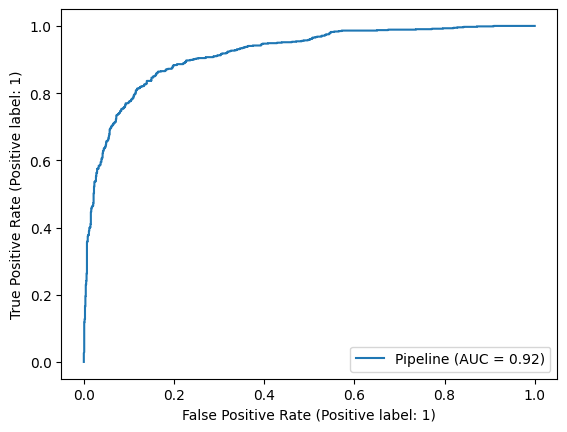

In [39]:
plot_roc_curve(best_model, X_oot, y_oot)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


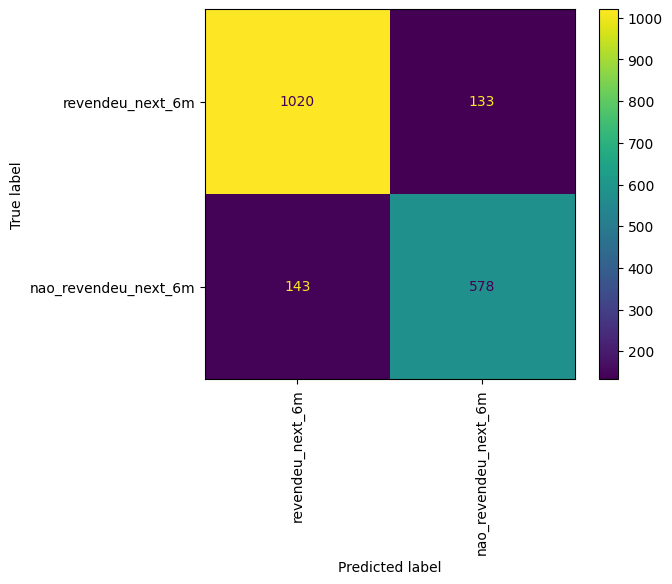

In [40]:
plot_confusion_matrix(best_model, X_oot, y_oot, values_format='d', display_labels=['revendeu_next_6m', 'nao_revendeu_next_6m'], xticks_rotation='vertical')

In [41]:
#1 average cost of not reselling
(
    df_train
    .query('nao_revendeu_next_6m == 1')
    .assign(comissao_12m = lambda df_em_memoria: df_em_memoria['receita_12m'] * 0.10)
    .filter(['comissao_12m'])
    .mean()
)

comissao_12m    110.161276
dtype: float64

In [42]:
!pip install numpy==1.23

  Using cached numpy-1.23.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (2.2 kB)
Using cached numpy-1.23.0-cp39-cp39-macosx_10_9_x86_64.whl (18.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
pdpbox 0.3.0 requires matplotlib>=3.6.2, but you have matplotlib 3.4.3 which is incompatible.
pdpbox 0.3.0 requires xgboost>=1.7.1, but you have xgboost 1.6.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.23.0 which is incompatible.
dtreeviz 2.2.1 requires graphviz>=0.9, but you have graphviz 0.8.4 which is incompatible.
visions 0.7.6 requires numpy>=1.23.2, but you have numpy 1.23.0 which is incompatible.
ydata-profil

In [43]:
# Installing libs and dependencies
!pip install scikit-learn==1.1.3
!pip install shap
!pip install pipdeptree

In [44]:
# importing libs
import shap

In [45]:
# verifying libs
import sklearn
import shap
import numpy
import pandas
import scipy

print("scikit-learn:", sklearn.__version__)
print("shap:", shap.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("scipy:", scipy.__version__)

scikit-learn: 1.1.3
shap: 0.46.0
numpy: 1.24.3
pandas: 2.0.3
scipy: 1.13.1


In [46]:
explainer = shap.TreeExplainer(best_model[-1])

In [47]:
best_model

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['tot_orders_12m', 'tot_items_12m',
                                              'tot_items_dist_12m',
                                              'receita_12m', 'recencia'])),
                ('categoric_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('lgbm', LGBMClassifier(random_state=42))])

In [48]:
X_oot_transformed = best_model[:-1].transform(X_oot)
X_oot_transformed.head(2)

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_SP,uf_ES,uf_GO,uf_PR,uf_MG,...,uf_MT,uf_AM,uf_RO,uf_CE,uf_BA,uf_SE,uf_MS,uf_PA,uf_MA,uf_PI
3495,3,3,1,2685.00,133,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,178,209,9,21621.13,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_oot_transformed.var()['recencia']

9141.532144995928

In [50]:
X_oot_transformed.var()['tot_items_dist_12m']

481.3679923829149

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


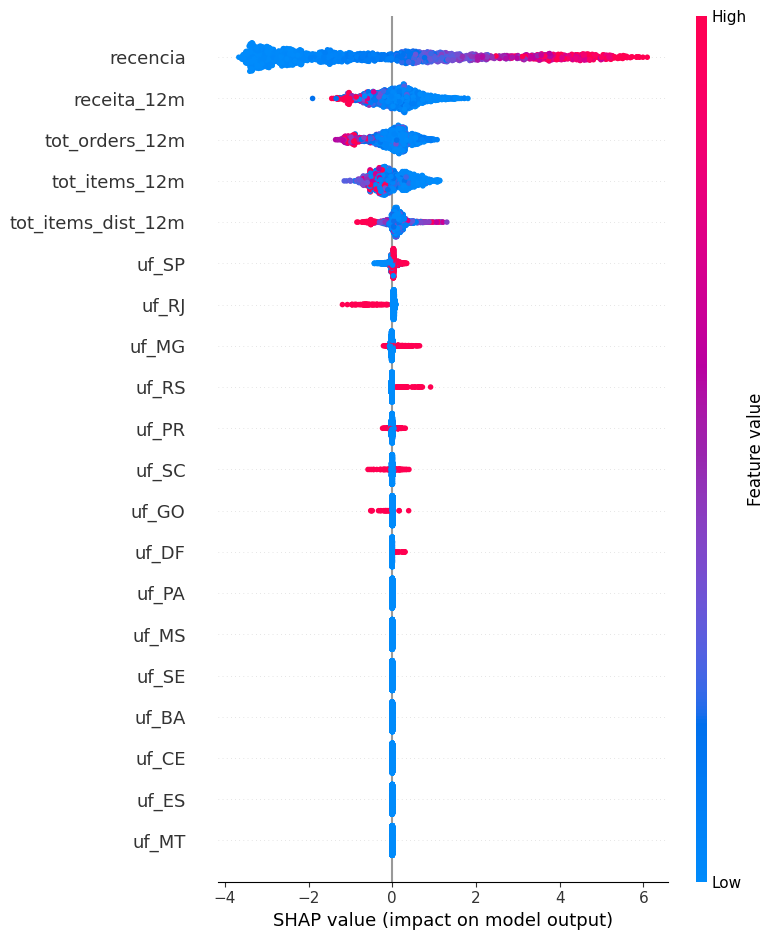

In [51]:
shap_values = explainer.shap_values(X_oot_transformed)
shap.summary_plot(shap_values, X_oot_transformed)

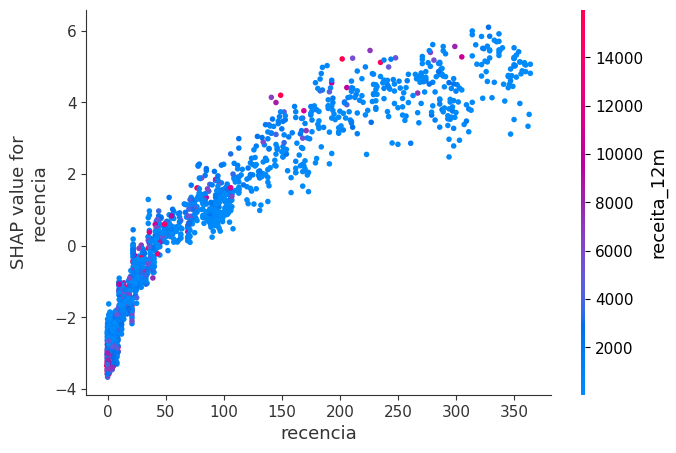

In [52]:
shap.dependence_plot('recencia', shap_values, X_oot_transformed, interaction_index='receita_12m')

In [53]:
# Importing model lib
import joblib

In [54]:
# Dump the best_model
directory = '/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/classification-II/models/'
if not os.path.exists(directory):
    print("Directory does not exist.")
else:
    joblib.dump(best_model, os.path.join(directory, 'best_model.pkl'))

In [55]:
best_model

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['tot_orders_12m', 'tot_items_12m',
                                              'tot_items_dist_12m',
                                              'receita_12m', 'recencia'])),
                ('categoric_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('lgbm', LGBMClassifier(random_state=42))])

## Predictions on new data

In [56]:
!pip install feature-engine catboost

In [57]:
model = joblib.load('/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/classification-II/models/best_model.pkl')
model

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['tot_orders_12m', 'tot_items_12m',
                                              'tot_items_dist_12m',
                                              'receita_12m', 'recencia'])),
                ('categoric_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('lgbm', LGBMClassifier(random_state=42))])

In [58]:
# Read the data
WORK_DIR = '/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/'
DATA_DIR = os.path.join(WORK_DIR, 'databases')

df_orders = pd.read_csv(os.path.join(DATA_DIR, 'olist_orders_dataset.csv'), parse_dates=['order_approved_at'])
df_order_items = pd.read_csv(os.path.join(DATA_DIR, 'olist_order_items_dataset.csv'))
df_sellers = pd.read_csv(os.path.join(DATA_DIR, 'olist_sellers_dataset.csv'))

In [59]:
df_orders['order_approved_at'].agg({'min', 'max'})

max   2018-09-03 17:40:06
min   2016-09-15 12:16:38
Name: order_approved_at, dtype: datetime64[ns]

In [60]:
import dateutil

data_ref_safra = pd.to_datetime('2018-04-01').date()
data_inf_inclusive = data_ref_safra - dateutil.relativedelta.relativedelta(months=12)

df_production = (
    df_order_items
    .merge(df_orders, on='order_id', how='inner')
    .query('order_status == "delivered"')
    .query(f'order_approved_at >= "{data_inf_inclusive}" & order_approved_at < "{data_ref_safra}"')
    .merge(df_sellers, on='seller_id', how='left')
    .groupby('seller_id')
    .agg(
        uf = ('seller_state', 'first'),
        tot_orders_12m = ('order_id', 'nunique'),
        tot_items_12m = ('product_id', 'count'),
        tot_items_dist_12m = ('product_id', 'nunique'),
        receita_12m = ('price', 'sum'),
        last_date_sale = ('order_approved_at', 'max')
    )
    .reset_index()
    .assign(data_ref_safra = pd.to_datetime(f'{data_ref_safra}'))
    .assign(recencia = lambda df_in_memory: (df_in_memory['data_ref_safra'] - df_in_memory['last_date_sale']).dt.days)
    .filter(['data_ref_safra', 'seller_id', 'uf', 'tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia'])
)

df_production

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
0,2018-04-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,164
1,2018-04-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,195,10,20321.53,0
2,2018-04-01,002100f778ceb8431b7a1020ff7ab48f,SP,48,52,23,1106.80,4
3,2018-04-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,106
4,2018-04-01,004c9cd9d87a3c30c522c48c4fc07416,SP,126,131,65,14685.67,5
...,...,...,...,...,...,...,...,...
1936,2018-04-01,ffad1e7127fb622cb64a900751590acd,SP,1,2,1,35.60,18
1937,2018-04-01,ffc470761de7d0232558ba5e786e57b7,SP,6,7,6,555.57,25
1938,2018-04-01,ffdd9f82b9a447f6f8d4b91554cc7dd3,PR,10,11,8,1350.30,38
1939,2018-04-01,ffeee66ac5d5a62fe688b9d26f83f534,SP,13,13,3,1709.87,31


In [61]:
key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']

features = cat_vars + num_vars

X_production = df_production[features]
X_production

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
0,SP,3,3,1,2685.00,164
1,ES,171,195,10,20321.53,0
2,SP,48,52,23,1106.80,4
3,GO,1,1,1,120.00,106
4,SP,126,131,65,14685.67,5
...,...,...,...,...,...,...
1936,SP,1,2,1,35.60,18
1937,SP,6,7,6,555.57,25
1938,PR,10,11,8,1350.30,38
1939,SP,13,13,3,1709.87,31


In [62]:
y_pred_prod   = model.predict(X_production)
y_pred_prod_1 = model.predict_proba(X_production)[:, 1]
y_pred_prod_0 = model.predict_proba(X_production)[:, 0]

In [63]:
df_production

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
0,2018-04-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,164
1,2018-04-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,195,10,20321.53,0
2,2018-04-01,002100f778ceb8431b7a1020ff7ab48f,SP,48,52,23,1106.80,4
3,2018-04-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,106
4,2018-04-01,004c9cd9d87a3c30c522c48c4fc07416,SP,126,131,65,14685.67,5
...,...,...,...,...,...,...,...,...
1936,2018-04-01,ffad1e7127fb622cb64a900751590acd,SP,1,2,1,35.60,18
1937,2018-04-01,ffc470761de7d0232558ba5e786e57b7,SP,6,7,6,555.57,25
1938,2018-04-01,ffdd9f82b9a447f6f8d4b91554cc7dd3,PR,10,11,8,1350.30,38
1939,2018-04-01,ffeee66ac5d5a62fe688b9d26f83f534,SP,13,13,3,1709.87,31


In [64]:
y_pred_prod_1

array([8.44880428e-01, 8.32790808e-04, 1.38466010e-02, ...,
       8.91901378e-02, 3.37136349e-01, 4.26938201e-01])

In [65]:
df_production            = df_production.assign(classe_prevista = y_pred_prod)
df_production['score_1'] = y_pred_prod_1
df_production['score_0'] = y_pred_prod_0

In [66]:
pd.options.display.float_format = '{:.4f}'.format

In [67]:
df_production.sort_values('score_1', ascending=False).head(20)

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,classe_prevista,score_1,score_0
1195,2018-04-01,9c57bc60cfad5ee62d35d3f1ce4593a1,PR,1,1,1,180.0000,334,1,0.9989,0.0011
108,2018-04-01,0c7f30ae9b147eca07affbef92832a6a,PR,2,2,2,169.8000,348,1,0.9982,0.0018
961,2018-04-01,7c4402417d51474d4d0cda9557340e40,SP,1,1,1,119.9000,326,1,0.9981,0.0019
930,2018-04-01,78ba5933c21686d1c2f64669c8c459e7,SP,1,1,1,105.9000,319,1,0.9980,0.0020
159,2018-04-01,13fa2a6c6b9d0f43cb588d7c82117a12,SP,9,10,4,4528.0000,183,1,0.9976,0.0024
830,2018-04-01,6d1b9c9579132c87d2703ec38c30f2c5,PR,2,2,1,159.8000,273,1,0.9975,0.0025
65,2018-04-01,07a9bc7f61396b658ddf3ac534efe44c,SP,1,1,1,119.9000,278,1,0.9974,0.0026
1365,2018-04-01,b3e2faf2c1004d674f16a3aa3197f0e1,SP,1,1,1,24.4900,324,1,0.9973,0.0027
1020,2018-04-01,84c945f15571830c1a91a33978e94009,SP,1,1,1,25.9900,321,1,0.9973,0.0027
222,2018-04-01,1c83418358f249c9d6affa52d579db0e,SP,1,1,1,24.9000,336,1,0.9973,0.0027


In [68]:
df_ref = pd.read_csv('/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/databases/propensao_revenda_abt.csv')
df_ref.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.0000,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.2300,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.8000,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.0000,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.8800,8,0


In [69]:
X_ref = df_ref[features]

y_pred_ref = model.predict(X_ref)
y_proba_ref_1 = model.predict_proba(X_ref)[:, 1]
y_proba_ref_0 = model.predict_proba(X_ref)[:, 0]

X_ref= X_ref.assign(classe_prevista = y_pred_ref)
X_ref['score_1'] = y_proba_ref_1
X_ref['score_0'] = y_proba_ref_0
X_ref.head(3)

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,classe_prevista,score_1,score_0
0,SP,3,3,1,2685.0000,74,1,0.6884,0.3116
1,ES,171,207,9,21275.2300,2,0,0.0011,0.9989
2,SP,38,42,15,781.8000,2,0,0.0834,0.9166


In [70]:
X_prod = df_production.iloc[:, 2:]
X_prod.head(3)

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,classe_prevista,score_1,score_0
0,SP,3,3,1,2685.0000,164,1,0.8449,0.1551
1,ES,171,195,10,20321.5300,0,0,0.0008,0.9992
2,SP,48,52,23,1106.8000,4,0,0.0138,0.9862


In [71]:
from feature_engine.encoding import OrdinalEncoder

oe = OrdinalEncoder(variables=cat_vars, encoding_method='arbitrary')
X_ref = oe.fit_transform(X_ref)
X_prod = oe.transform(X_prod)
X_prod

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,classe_prevista,score_1,score_0
0,0,3,3,1,2685.0000,164,1,0.8449,0.1551
1,1,171,195,10,20321.5300,0,0,0.0008,0.9992
2,0,48,52,23,1106.8000,4,0,0.0138,0.9862
3,2,1,1,1,120.0000,106,1,0.6021,0.3979
4,0,126,131,65,14685.6700,5,0,0.0016,0.9984
...,...,...,...,...,...,...,...,...,...
1936,0,1,2,1,35.6000,18,0,0.3257,0.6743
1937,0,6,7,6,555.5700,25,0,0.0485,0.9515
1938,3,10,11,8,1350.3000,38,0,0.0892,0.9108
1939,0,13,13,3,1709.8700,31,0,0.3371,0.6629


In [72]:
column_mapping = {
    'numerical_features': num_vars + ['score_1'], 
    'categorical_features': cat_vars
}
column_mapping

{'numerical_features': ['tot_orders_12m',
  'tot_items_12m',
  'tot_items_dist_12m',
  'receita_12m',
  'recencia',
  'score_1'],
 'categorical_features': ['uf']}

In [ ]:
#